In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# ----------------------------
# 1. Download the Data
# ----------------------------
symbols = ["LTPZ", "MSFT", "GOOG", "F", "PEP", "SPY", "GC=F"]

# You can adjust the start/end dates based on your preference
start_date = "2018-01-01"
end_date   = "2024-12-31"

# Download daily data from Yahoo Finance
data = yf.download(symbols, start=start_date, end=end_date)["Adj Close"]

data

[*********************100%***********************]  7 of 7 completed


Ticker,F,GC=F,GOOG,LTPZ,MSFT,PEP,SPY
Date,,,,,,,
2018-01-02 00:00:00+00:00,8.875398,1313.699951,53.059353,53.627174,79.633514,96.114479,239.993759
2018-01-03 00:00:00+00:00,8.945502,1316.199951,53.930225,53.837959,80.004128,95.862091,241.511780
2018-01-04 00:00:00+00:00,9.099737,1319.400024,54.125519,53.884808,80.708267,96.334290,242.529694
2018-01-05 00:00:00+00:00,9.253969,1320.300049,54.914188,53.853569,81.708916,96.611084,244.145905
2018-01-08 00:00:00+00:00,9.218917,1318.599976,55.148846,53.650589,81.792282,96.057472,244.592468
...,...,...,...,...,...,...,...
2024-12-23 00:00:00+00:00,9.900000,2612.300049,195.990005,52.110229,435.250000,151.289993,594.690002
2024-12-24 00:00:00+00:00,10.020000,2620.000000,197.570007,52.449581,439.329987,152.809998,601.299988
2024-12-26 00:00:00+00:00,10.070000,2638.800049,197.100006,52.459564,438.109985,152.440002,601.340027


Model 1 CAPM

In [3]:
# ----------------------------
# 2. Compute Log Returns
# ----------------------------
# Calculate daily log returns
stock_returns = np.log(data).diff()

# ----------------------------
# 3. Compute the Risk Premium
# ----------------------------
risk_free_rate = 0.06        # Annual risk-free rate
trading_days   = 252
daily_rf       = risk_free_rate / trading_days

risk_premium = stock_returns - daily_rf
risk_premium

Ticker,F,GC=F,GOOG,LTPZ,MSFT,PEP,SPY
Date,,,,,,,
2018-01-02 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03 00:00:00+00:00,0.007630,0.001663,0.016042,0.003685,0.004405,-0.002867,0.006067
2018-01-04 00:00:00+00:00,0.016857,0.002190,0.003377,0.000632,0.008525,0.004676,0.003968
2018-01-05 00:00:00+00:00,0.016569,0.000444,0.014228,-0.000818,0.012084,0.002631,0.006404
2018-01-08 00:00:00+00:00,-0.004033,-0.001527,0.004026,-0.004014,0.000782,-0.005985,0.001589
...,...,...,...,...,...,...,...
2024-12-23 00:00:00+00:00,0.001784,-0.006496,0.015343,-0.004634,-0.003335,-0.010104,0.005732
2024-12-24 00:00:00+00:00,0.011810,0.002705,0.007791,0.006253,0.009092,0.009759,0.010816
2024-12-26 00:00:00+00:00,0.004739,0.006912,-0.002620,-0.000048,-0.003019,-0.002662,-0.000172


In [4]:
# ----------------------------
# 4. Reshape Data for Plotting
# ----------------------------
# We want SPY's risk premium to be the x-axis, 
# and each of the other symbols' risk premiums on the y-axis.
spy_col = "SPY"  # The SPY column name in 'risk_premium'
risk_premium = risk_premium.rename_axis("Date").reset_index()

# Melt so that we get one row per date per ticker
melted = pd.melt(
    risk_premium,
    id_vars="Date",
    var_name="Symbol",
    value_name="RiskPremium"
)

# Separate SPY from the rest by merging back on Date
spy_data = melted[melted["Symbol"] == spy_col].rename(
    columns={"RiskPremium": "SPY_RiskPremium"}
).drop("Symbol", axis=1)


# Merge the SPY column into each symbol's set
merged = pd.merge(
    melted, spy_data, on="Date", how="left"
)

# Filter out SPY rows (since we only want SPY on the x-axis, 
# not to compare SPY vs SPY)
merged = merged[merged["Symbol"] != spy_col]

merged

,Date,Symbol,RiskPremium,SPY_RiskPremium
0,2018-01-02 00:00:00+00:00,F,NaN,NaN
1,2018-01-03 00:00:00+00:00,F,0.007630,0.006067
2,2018-01-04 00:00:00+00:00,F,0.016857,0.003968
3,2018-01-05 00:00:00+00:00,F,0.016569,0.006404
4,2018-01-08 00:00:00+00:00,F,-0.004033,0.001589
...,...,...,...,...
10555,2024-12-23 00:00:00+00:00,PEP,-0.010104,0.005732
10556,2024-12-24 00:00:00+00:00,PEP,0.009759,0.010816
10557,2024-12-26 00:00:00+00:00,PEP,-0.002662,-0.000172
10558,2024-12-27 00:00:00+00:00,PEP,0.002710,-0.010820


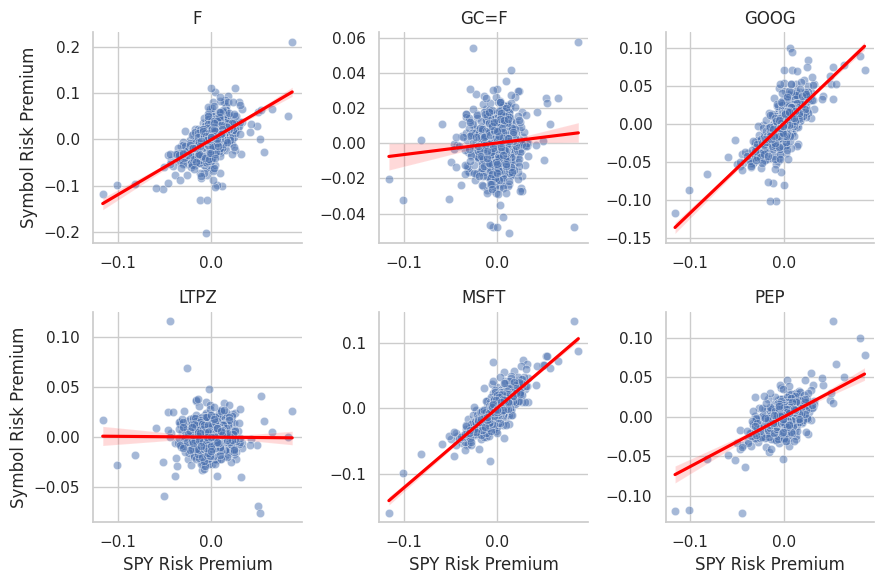

In [6]:
# ----------------------------
# 5. Plot the Scatter + Regression by Symbol
# ----------------------------
sns.set(style="whitegrid")  # somewhat similar to R's theme_bw
g = sns.FacetGrid(
    merged.dropna(),        # drop NAs to avoid plot errors
    col="Symbol", 
    col_wrap=3,             # number of facets per row
    sharex=False, 
    sharey=False
)

# First plot the scatter
g.map_dataframe(sns.scatterplot, x="SPY_RiskPremium", y="RiskPremium", alpha=0.5)


# Then overlay a regression line
# (setting scatter=False prevents double plotting of points)
def regplot_with_line(data, color, **kwargs):
    sns.regplot(
        data=data, 
        x="SPY_RiskPremium", 
        y="RiskPremium", 
        scatter=False, 
        color="red"
    )

g.map_dataframe(regplot_with_line)

g.set_axis_labels("SPY Risk Premium", "Symbol Risk Premium")
g.set_titles(col_template="{col_name}")

plt.tight_layout()
plt.show()

In [7]:
# ----------------------------
# 6. Run CAPM-like Regression for "GC=F" vs. SPY
# ----------------------------
# Extract only rows corresponding to GC=F
gc_df = merged[merged["Symbol"] == "GC=F"].dropna()

# Fit OLS model: GC=F risk premium ~ SPY risk premium
capm_model = smf.ols("RiskPremium ~ SPY_RiskPremium", data=gc_df).fit()

# Print summary (equivalent to summary() in R)
print(capm_model.summary())

                            OLS Regression Results                            
Dep. Variable:            RiskPremium   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     13.21
Date:                Thu, 16 Jan 2025   Prob (F-statistic):           0.000287
Time:                        16:07:47   Log-Likelihood:                 5708.3
No. Observations:                1757   AIC:                        -1.141e+04
Df Residuals:                    1755   BIC:                        -1.140e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0001      0.000     

Model 2 - CAPM

In [15]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# ----------------------------
# 1. Download the Data
# ----------------------------
symbols = ["LTPZ", "MSFT", "GOOG", "F", "PEP", "SPY", "GC=F"]

# You can adjust the start/end dates based on your preference
start_date = "2018-01-01"
end_date   = "2024-12-31"

# Download daily data from Yahoo Finance
data = yf.download(symbols, start=start_date, end=end_date)["Adj Close"]

# ----------------------------
# 2. Compute Daily Log Returns
# ----------------------------
stock_returns = np.log(data).diff()

stock_returns


[*********************100%***********************]  7 of 7 completed


Ticker,F,GC=F,GOOG,LTPZ,MSFT,PEP,SPY
Date,,,,,,,
2018-01-02 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03 00:00:00+00:00,0.007868,0.001901,0.016280,0.003923,0.004643,-0.002629,0.006305
2018-01-04 00:00:00+00:00,0.017095,0.002428,0.003615,0.000870,0.008763,0.004914,0.004206
2018-01-05 00:00:00+00:00,0.016807,0.000682,0.014466,-0.000580,0.012322,0.002869,0.006642
2018-01-08 00:00:00+00:00,-0.003795,-0.001288,0.004264,-0.003776,0.001020,-0.005747,0.001827
...,...,...,...,...,...,...,...
2024-12-23 00:00:00+00:00,0.002022,-0.006258,0.015581,-0.004396,-0.003097,-0.009866,0.005970
2024-12-24 00:00:00+00:00,0.012048,0.002943,0.008029,0.006491,0.009330,0.009997,0.011054
2024-12-26 00:00:00+00:00,0.004978,0.007150,-0.002382,0.000190,-0.002781,-0.002424,0.000067


In [16]:
# ----------------------------
# 3. Compute the Daily Risk Premium
# ----------------------------
risk_free_rate = 0.06  # Annual risk-free rate
trading_days   = 252
daily_rf       = risk_free_rate / trading_days

risk_premium = stock_returns - daily_rf

# ----------------------------
# 4. Reshape Data for Plotting (Daily)
# ----------------------------
spy_col = "SPY"  # The SPY column name in 'risk_premium'
risk_premium = risk_premium.rename_axis("Date").reset_index()

# Melt the dataframe for plotting (daily data)
melted = pd.melt(
    risk_premium,
    id_vars="Date",
    var_name="Symbol",
    value_name="RiskPremium"
)

melted

,Date,Symbol,RiskPremium
0,2018-01-02 00:00:00+00:00,F,NaN
1,2018-01-03 00:00:00+00:00,F,0.007630
2,2018-01-04 00:00:00+00:00,F,0.016857
3,2018-01-05 00:00:00+00:00,F,0.016569
4,2018-01-08 00:00:00+00:00,F,-0.004033
...,...,...,...
12315,2024-12-23 00:00:00+00:00,SPY,0.005732
12316,2024-12-24 00:00:00+00:00,SPY,0.010816
12317,2024-12-26 00:00:00+00:00,SPY,-0.000172
12318,2024-12-27 00:00:00+00:00,SPY,-0.010820


In [17]:
# Create a separate DataFrame for SPY only
spy_data = melted[melted["Symbol"] == spy_col].rename(
    columns={"RiskPremium": "SPY_RiskPremium"}
).drop("Symbol", axis=1)

# Merge SPY's risk premium into the rest
merged = pd.merge(melted, spy_data, on="Date", how="left")

# Filter out SPY rows since we only want SPY on the x-axis
merged = merged[merged["Symbol"] != spy_col]

merged

,Date,Symbol,RiskPremium,SPY_RiskPremium
0,2018-01-02 00:00:00+00:00,F,NaN,NaN
1,2018-01-03 00:00:00+00:00,F,0.007630,0.006067
2,2018-01-04 00:00:00+00:00,F,0.016857,0.003968
3,2018-01-05 00:00:00+00:00,F,0.016569,0.006404
4,2018-01-08 00:00:00+00:00,F,-0.004033,0.001589
...,...,...,...,...
10555,2024-12-23 00:00:00+00:00,PEP,-0.010104,0.005732
10556,2024-12-24 00:00:00+00:00,PEP,0.009759,0.010816
10557,2024-12-26 00:00:00+00:00,PEP,-0.002662,-0.000172
10558,2024-12-27 00:00:00+00:00,PEP,0.002710,-0.010820


In [18]:
# ----------------------------
# 5. Convert Daily Returns to Monthly Returns
# ----------------------------
# We will follow the same approach as in R: summing daily log returns for each month
#  (this is effectively the net monthly log return).
monthly_returns = stock_returns.resample('M').sum().dropna()

# Optional: Because some symbols have characters like '=' in their names (e.g. "GC=F"),
# we can rename them to valid Python identifiers if we want to use formula syntax easily.
monthly_returns = monthly_returns.rename(columns={"GC=F": "Gold"})

# If you want to see the monthly returns:
print("Monthly log returns (sum of daily log returns in each month):")
print(monthly_returns.head())

Monthly log returns (sum of daily log returns in each month):
Ticker                            F      Gold      GOOG      LTPZ      MSFT  \
Date                                                                          
2018-01-31 00:00:00+00:00 -0.118955  0.031134  0.093978 -0.006280  0.100217   
2018-02-28 00:00:00+00:00 -0.033367 -0.017706 -0.057351 -0.038986 -0.008451   
2018-03-31 00:00:00+00:00  0.043344  0.005534 -0.068306  0.022145 -0.027022   
2018-04-30 00:00:00+00:00  0.027665 -0.005002 -0.014114  0.002839  0.024353   
2018-05-31 00:00:00+00:00  0.027207 -0.012308  0.064389 -0.001650  0.059652   

Ticker                          PEP       SPY  
Date                                           
2018-01-31 00:00:00+00:00  0.018796  0.047697  
2018-02-28 00:00:00+00:00 -0.091966 -0.037038  
2018-03-31 00:00:00+00:00  0.002064 -0.027793  
2018-04-30 00:00:00+00:00 -0.078197  0.005155  
2018-05-31 00:00:00+00:00  0.002296  0.024018  


/tmp/ipykernel_28405/2796846896.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_returns = stock_returns.resample('M').sum().dropna()


In [19]:
# ----------------------------
# 6. Run Linear Regressions (Monthly)
# ----------------------------
# Example 1: Regress PEP monthly returns on SPY monthly returns
model_pep_spy = smf.ols(formula='PEP ~ SPY', data=monthly_returns).fit()
print("\nPEP ~ SPY (Monthly Regression)\n", model_pep_spy.summary())

# Example 2: Regress F monthly returns on SPY monthly returns
model_f_spy = smf.ols(formula='F ~ SPY', data=monthly_returns).fit()
print("\nF ~ SPY (Monthly Regression)\n", model_f_spy.summary())

# You can add more regressions for other stocks similarly:
# model_msft_spy = smf.ols(formula='MSFT ~ SPY', data=monthly_returns).fit()
# print("\nMSFT ~ SPY (Monthly Regression)\n", model_msft_spy.summary())

# model_goog_spy = smf.ols(formula='GOOG ~ SPY', data=monthly_returns).fit()
# print("\nGOOG ~ SPY (Monthly Regression)\n", model_goog_spy.summary())


PEP ~ SPY (Monthly Regression)
                             OLS Regression Results                            
Dep. Variable:                    PEP   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     36.07
Date:                Thu, 16 Jan 2025   Prob (F-statistic):           4.99e-08
Time:                        16:18:11   Log-Likelihood:                 154.62
No. Observations:                  84   AIC:                            -305.2
Df Residuals:                      82   BIC:                            -300.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -9.413e-